## SF crime data analysis and modeling

### In this notebook, you can learn how to use Spark SQL for big data analysis on SF crime data. (https://data.sfgov.org/Public-Safety/sf-data/skgt-fej3/data). 
The first part of Homework is OLAP for scrime data analysis (80 credits).  
The second part is unsupervised learning for spatial data analysis (20 credits).   
The option part is the time series data analysis (50 credits).  
**Note**: you can download the small data (one month e.g. 2018-10) for debug, then download the data from 2013 to 2018 for testing and analysising. 

### How to submit the report for grading ? 
Publish your notebook and send your notebook to mike@laioffer.com, the email title would be like this way: Laidata181128_Spark_Hw1_Yourname  
Your report have to contain your data analysis insights.  
**DD** is 03/01/2019

In [3]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from ggplot import *
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"


In [4]:
# read data from the data storage
# please upload your data into databricks community at first. 
crime_data_lines = sc.textFile('/FileStore/tables/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
#                                sf_data.csv')
#prepare data 
df_crimes = crime_data_lines.map(lambda line: [x.strip('"') for x in next(reader([line]))])
#get header
header = df_crimes.first()
print(header)

#remove the first line of data
crimes = df_crimes.filter(lambda x: x != header)

#get the first line of data
display(crimes.take(3))

#get the total number of data 
print(crimes.count())


_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13
150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.42158168137,37.7617007179518,"(37.7617007179518, -122.42158168137)",15006027571000
150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821003074
150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821004014


### Solove  big data issues via Spark
approach 1: use RDD (not recommend)  
approach 2: use Dataframe, register the RDD to a dataframe (recommend for DE)  
approach 3: use SQL (recomend for data analysis or DS， 基础比较差的同学)  
***note***: you only need to choose one of approaches as introduced above

#### We provide 3 options to transform distributed data into dataframe and SQL table, you can choose any one of them to practice

In [7]:

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate() 

df_opt1 = spark.read.format("csv").option("header", "true").load("/FileStore/tables/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.42158168137,37.7617007179518,"(37.7617007179518, -122.42158168137)",15006027571000
150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821003074
150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821004014
150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821015200
150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431118543788,37.8004687042875,"(37.8004687042875, -122.431118543788)",15009822628160
150098232,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Sunday,02/01/2015,16:21,RICHMOND,NONE,400 Block of LOCUST ST,-122.451781767894,37.7870853907529,"(37.7870853907529, -122.451781767894)",15009823251041
150098248,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824815200
150098248,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824828150
150098254,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,01/31/2015,16:09,CENTRAL,NONE,200 Block of STOCKTON ST,-122.40656817787,37.7878092959561,"(37.7878092959561, -122.40656817787)",15009825405053
150098260,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,01/31/2015,17:00,CENTRAL,NONE,800 Block of GEARY ST,-122.417295322526,37.7862578545865,"(37.7862578545865, -122.417295322526)",15009826006362


In [8]:

from pyspark.sql import Row

def createRow(keys, values):
  assert len(keys) == len(values)
  mapped = dict(zip(keys, values))
  return Row(**mapped)

rdd_rows = crimes.map(lambda x: createRow(header, x))
df_opt2 = spark.createDataFrame(rdd_rows)
df_opt2.createOrReplaceTempView("sf_crime")
# display(df_opt2)

In [9]:
df_opt3 = crimes.toDF(header)
# ['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'])
display(df_opt3)
df_opt3.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.42158168137,37.7617007179518,"(37.7617007179518, -122.42158168137)",15006027571000
150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821003074
150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821004014
150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821015200
150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431118543788,37.8004687042875,"(37.8004687042875, -122.431118543788)",15009822628160
150098232,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Sunday,02/01/2015,16:21,RICHMOND,NONE,400 Block of LOCUST ST,-122.451781767894,37.7870853907529,"(37.7870853907529, -122.451781767894)",15009823251041
150098248,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824815200
150098248,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824828150
150098254,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,01/31/2015,16:09,CENTRAL,NONE,200 Block of STOCKTON ST,-122.40656817787,37.7878092959561,"(37.7878092959561, -122.40656817787)",15009825405053
150098260,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,01/31/2015,17:00,CENTRAL,NONE,800 Block of GEARY ST,-122.417295322526,37.7862578545865,"(37.7862578545865, -122.417295322526)",15009826006362


#### Q1 question (OLAP): 
#####Write a Spark program that counts the number of crimes for different category.

Below are some example codes to demonstrate the way to use Spark RDD, DF, and SQL to work with big data. You can follow this example to finish other questions.

In [11]:

catorgory_set_rdd = crimes.map(lambda item: (item[1],1))
from operator import add
result = sorted(catorgory_set_rdd.reduceByKey(add).collect(), key = lambda item: -item[1])
display(result)

_1,_2
LARCENY/THEFT,480448
OTHER OFFENSES,309358
NON-CRIMINAL,238323
ASSAULT,194694
VEHICLE THEFT,126602
DRUG/NARCOTIC,119628
VANDALISM,116059
WARRANTS,101379
BURGLARY,91543
SUSPICIOUS OCC,80444


In [12]:
q1_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(q1_result)

category,count
LARCENY/THEFT,480448
OTHER OFFENSES,309358
NON-CRIMINAL,238323
ASSAULT,194694
VEHICLE THEFT,126602
DRUG/NARCOTIC,119628
VANDALISM,116059
WARRANTS,101379
BURGLARY,91543
SUSPICIOUS OCC,80444


In [13]:
#Spark SQL based
crimeCategory = spark.sql("SELECT category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
print(type(crimeCategory))
display(crimeCategory)

category,Count
LARCENY/THEFT,480448
OTHER OFFENSES,309358
NON-CRIMINAL,238323
ASSAULT,194694
VEHICLE THEFT,126602
DRUG/NARCOTIC,119628
VANDALISM,116059
WARRANTS,101379
BURGLARY,91543
SUSPICIOUS OCC,80444


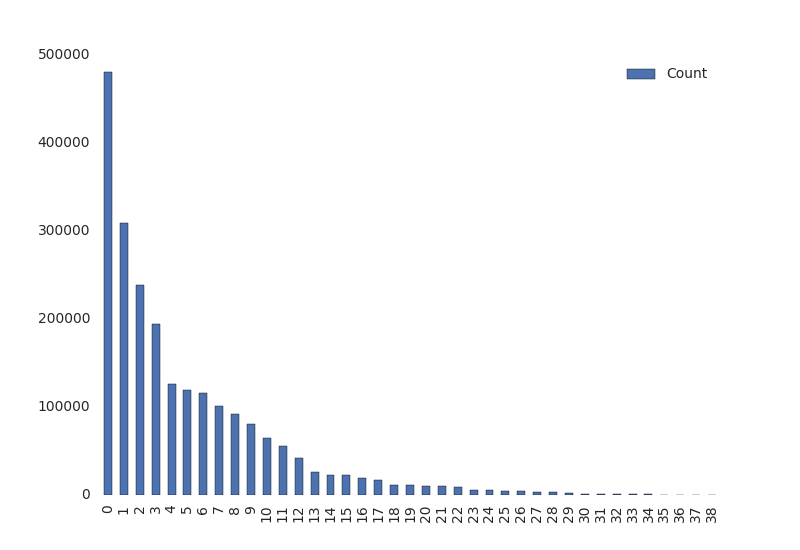

In [14]:
# important hints: 
## first step: spark df or sql to compute the statisitc result 
## second step: export your result to a pandas dataframe. 

crimes_pd_df = crimeCategory.toPandas()
# Spark does not support this function, please refer https://matplotlib.org/ for visuliation. You need to use display to show the figure in the databricks community. 
p = crimes_pd_df.plot.bar()
display(p.figure)

#### Q2 question (OLAP)
Counts the number of crimes for different district, and visualize your results

In [16]:
q2_result = df_opt1.groupBy('PdDistrict').count().orderBy('count', ascending=False)
display(q2_result)

PdDistrict,count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713
CENTRAL,226255
BAYVIEW,221000
INGLESIDE,194180
TENDERLOIN,191746
TARAVAL,166971
PARK,125479
RICHMOND,116818


In [17]:
q2_result = spark.sql("SELECT PdDistrict, COUNT(*) AS count FROM sf_crime GROUP BY 1 ORDER BY 2 DESC")

display(q2_result)

PdDistrict,count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713
CENTRAL,226255
BAYVIEW,221000
INGLESIDE,194180
TENDERLOIN,191746
TARAVAL,166971
PARK,125479
RICHMOND,116818


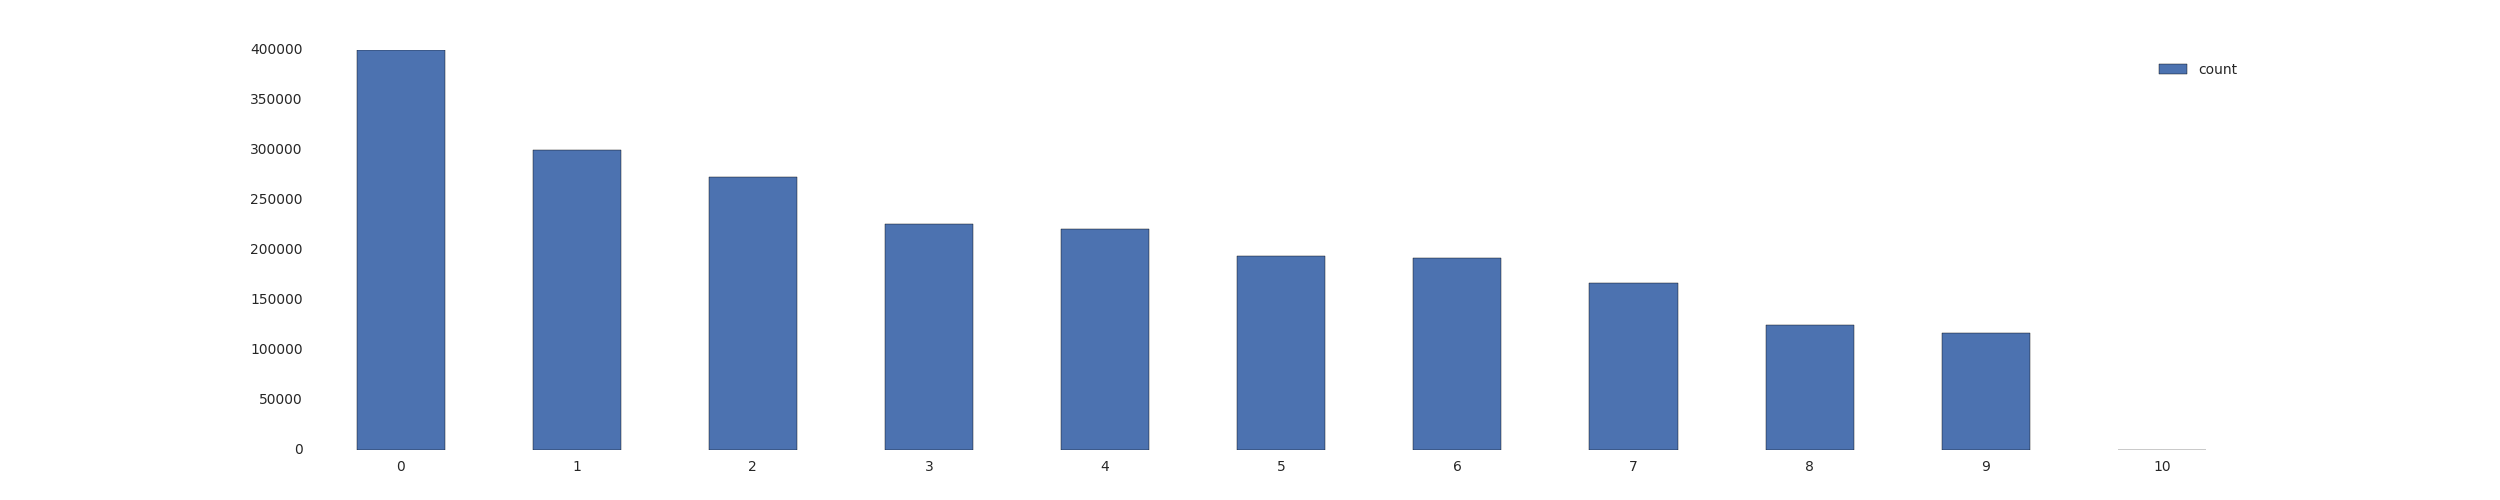

In [18]:
crimes_pd_df = q2_result.toPandas()
# Spark does not support this function, please refer https://matplotlib.org/ for visuliation. You need to use display to show the figure in the databricks community. 
p = crimes_pd_df.loc[:100].plot(kind = 'bar', figsize =(25,5), rot = 0 )
display(p.figure)

#### Q3 question (OLAP)
Count the number of crimes each "Sunday" at "SF downtown".   
hints: SF downtown is defiend  via the range of spatial location. For example, you can use a rectangle to define the SF downtown, or you can define a cicle with center as well. Thus, you need to write your own UDF function to filter data which are located inside certain spatial range. You can follow the example here: https://changhsinlee.com/pyspark-udf/

center point 37.778548, -122.418228  farest point 37.782771, -122.414076
              Y          X

In [20]:
from pyspark.sql.functions import hour, date_format, to_date
def isDowntown(Y, X):
  return (float(Y) - 37.778548) **2 + (float(X) + 122.418228) **2 <= (37.778548 - 37.782771) **2 + (-122.418228 + 122.414076) **2
from pyspark.sql.types import BooleanType


isDowntown_udf_bool = udf(lambda Y,X: isDowntown(Y, X), BooleanType())
# isDowntown_udf_bool
q3_res = df_opt1.where(isDowntown_udf_bool('Y', 'X') & (df_opt1.DayOfWeek == 'Sunday'))
                .groupBy('Date')
                .count()
                .orderBy(to_date('Date','MM/dd/yy'))
display(q3_res)

Date,count
01/05/2003,11
01/12/2003,20
01/19/2003,10
01/26/2003,14
02/02/2003,25
02/09/2003,21
02/16/2003,27
02/23/2003,16
03/02/2003,23
03/09/2003,18


In [21]:
spark.udf.register("isDowntown_udf_bool", isDowntown, BooleanType())
q3_res = spark.sql("SELECT Date, count(*) as numOfCrime  FROM sf_crime where isDowntown_udf_bool(Y, X) AND DayOfWeek = 'Sunday' GROUP BY Date ORDER BY to_date(Date,'MM/dd/yy')")


display(q3_res)

Date,numOfCrime
01/05/2003,11
01/12/2003,20
01/19/2003,10
01/26/2003,14
02/02/2003,25
02/09/2003,21
02/16/2003,27
02/23/2003,16
03/02/2003,23
03/09/2003,18


#### Q4 question (OLAP)
Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result? 

We can see the amount of crime of each month in 2018 is less than before. And the amount of crime in March is usually higher than other months. The police should put more police strength on March.

In [23]:
from pyspark.sql.functions import col
from pyspark.sql.functions import hour, date_format, to_date
df_opt1_new = df_opt1.withColumn('Date', to_date('Date','MM/dd/yy'))\
                    .select('*', date_format('Date', 'MM').alias('Month'), date_format('Date', 'yyyy').alias('Year'))
df_opt1_new.createOrReplaceTempView('sf_crime_date')

q4_res = df_opt1_new.groupBy('Year', 'Month').count().where(col('Year').isin(['2015', '2016', '2017', '2018'])).orderBy('Year', 'Month')
display(q4_res)

Year,Month,count
2015,01,13606
2015,02,12329
2015,03,13929
2015,04,12959
2015,05,13729
2015,06,13304
2015,07,13365
2015,08,13730
2015,09,12896
2015,10,13147


In [24]:
# s1:
# q4_res = spark.sql("SELECT substring(Date,1,2) as Month, substring(Date, 7,4) as Year, COUNT(*) AS numOfCrime  FROM sf_crime GROUP BY 1,2 ORDER BY 3 DESC")
# s2:
q4_res = spark.sql("SELECT date_format(Date,'yyyy') as Year, date_format(Date,'MM') as Month, COUNT(IncidntNum) AS numOfCrime  FROM sf_crime_date GROUP BY 2,1  HAVING Year in ('2015', '2016', '2017', '2018') ORDER BY 1,2")

display(q4_res)

Year,Month,numOfCrime
2015,01,13606
2015,02,12329
2015,03,13929
2015,04,12959
2015,05,13729
2015,06,13304
2015,07,13365
2015,08,13730
2015,09,12896
2015,10,13147


#### Q5 question (OLAP)
Analysis the number of crime w.r.t the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF. 

The most dangerous time is 12 o'clock and from 16 o'clock to 1 o'clock. Although the amount of crime in night is not higher than afternoon, it is also dangerous in night because the ratio of the amount of crime to the amount of people in street is much higher than daylight.

So do not go out at midnight and be careful at noon and after sunset.

In [26]:
q5_df = df_opt1_new.where(df_opt1_new.Date == '2016-12-15').select(hour(df_opt1_new.Time).alias('Hour'), 'IncidntNum').groupBy('Hour').count().orderBy('Hour')
display(q5_df)

# q5_df_ = df_opt1_new.where(df_opt1_new.Year == '2016').select(hour(df_opt1_new.Time).alias('Hour'), 'IncidntNum').groupBy('Hour').count().orderBy('Hour')
# display(q5_df_)

Hour,count
0,22
1,10
2,12
3,9
4,1
5,6
6,5
7,3
8,24
9,23


In [27]:
q5_res = spark.sql("SELECT hour(Time) as Hour, COUNT(*) AS numOfCrime FROM sf_crime_date WHERE Date = '2015-12-15' GROUP BY 1 ORDER BY 1")
display(q5_res)

Hour,numOfCrime
0,15
1,6
2,5
3,4
4,10
5,3
6,4
7,8
8,12
9,10


#### Q6 question (OLAP)
(1) Step1: Find out the top-3 danger disrict  
(2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1  
(3) give your advice to distribute the police based on your analysis results. 


The worst 3 districts are SOUTHERN, MISSION and NORTHER. Most of crime happened at noon and after 16 o'clock and most of them are larcenies.

The poice should patrol on these districts especially at noon and after 16 o'clock.

In [29]:
from pyspark.sql.functions import col
q6_res_1 = df_opt1_new.groupBy('PdDistrict').count().orderBy('count', ascending=False).limit(3).select('PdDistrict')
q6_res_1.select('PdDistrict').show()

# q6_res_2 = df_opt1_new.where(col('PdDistrict').isin(q6_res_1.PdDistrict))# isin 无法直接作用在别datafarme的列
# q6_res_2.show()
# # display(q6_res_2)
q6_res = df_opt1_new.withColumn('bool',df_opt1_new.PdDistrict.isin(q6_res_1.select('PdDistrict').rdd.flatMap(lambda x: x).collect())).select('IncidntNum', 'Category', hour('Time').alias('Hour')).groupBy('Category', 'Hour').count().orderBy('count', ascending = False)
display(q6_res)


Category,Hour,count
LARCENY/THEFT,18,38578
LARCENY/THEFT,19,36160
LARCENY/THEFT,17,32272
LARCENY/THEFT,20,31561
LARCENY/THEFT,16,28353
LARCENY/THEFT,12,27718
LARCENY/THEFT,15,27096
LARCENY/THEFT,21,26553
LARCENY/THEFT,22,25841
LARCENY/THEFT,14,25507


In [30]:
q6_res_1 = spark.sql("""SELECT PdDistrict FROM sf_crime_date GROUP BY 1 ORDER BY COUNT(*) DESC LIMIT 3""")
# display(q6_res_1)

q6_res_2 = spark.sql("""
                    SELECT Category, hour(Time) as Hour, COUNT(IncidntNum) AS numOfCrime
                    FROM sf_crime_date
                    WHERE PdDistrict IN (SELECT PdDistrict FROM sf_crime_date GROUP BY 1 ORDER BY COUNT(*) DESC LIMIT 3)
                    GROUP BY 1,2
                    ORDER BY 1,2""")
display(q6_res_2)

Category,Hour,numOfCrime
ARSON,0,84
ARSON,1,77
ARSON,2,84
ARSON,3,95
ARSON,4,74
ARSON,5,60
ARSON,6,50
ARSON,7,29
ARSON,8,35
ARSON,9,28


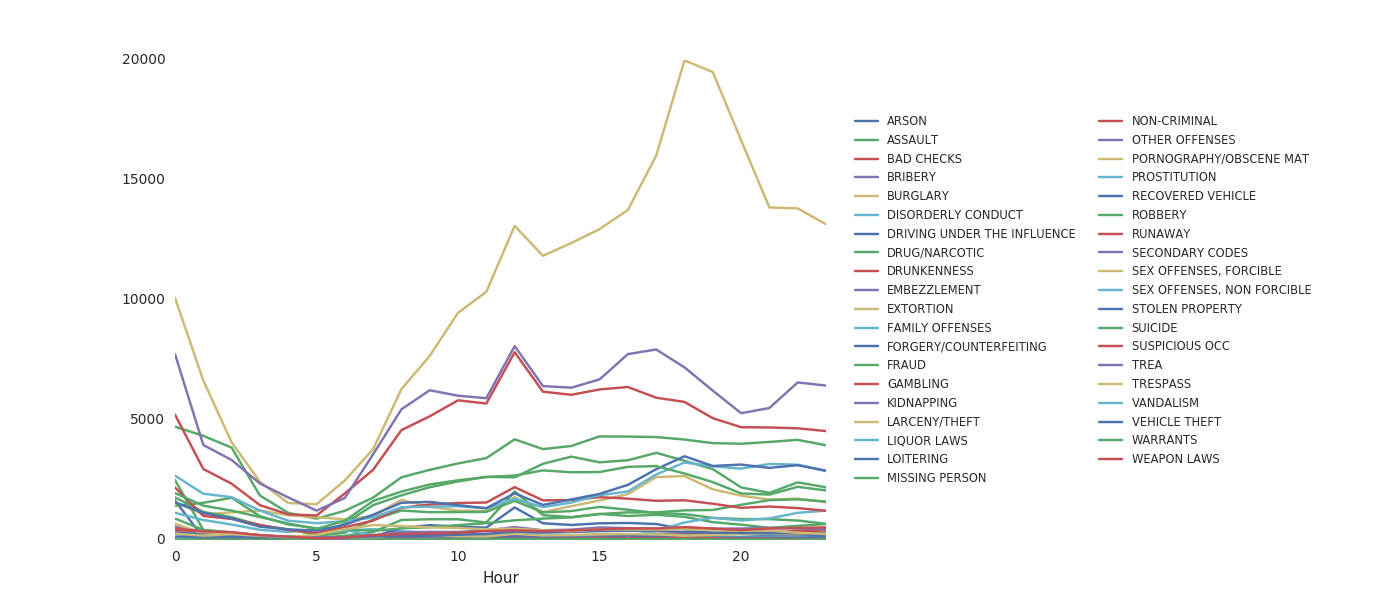

In [31]:
# from pyspark.sql.functions import distinct
q6_res = q6_res_2.toPandas()
fig, ax = plt.subplots(figsize=(14,6))
q6_res.groupby(['Hour', 'Category' ]).sum()['numOfCrime'].unstack().plot(kind='line',ax=ax)
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='center', bbox_to_anchor=(chartBox.width*1.8, 0.5), shadow=True, ncol=2, fontsize = 'x-small')
display(fig)

#### Q7 question (OLAP)
For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

A lot of unresolved event is related to theft. Consider the most happened place of theft is residential area， patrolling on the residential area at noon and after 16 o'clock could help a lot.

In [33]:
from pyspark.sql.functions import count
# df_opt1_new.groupBy('Category').agg(sum( col("Resolution") != 'NONE' ))


In [34]:
q7_res = spark.sql("SELECT Category, SUM(CASE WHEN Resolution != 'NONE' THEN 1 ELSE 0 END)/COUNT(IncidntNum) AS resolution_percent  FROM sf_crime_date GROUP BY Category ORDER BY 2")
display(q7_res)

Category,resolution_percent
RECOVERED VEHICLE,0.06918311151904544
VEHICLE THEFT,0.08390072826653608
LARCENY/THEFT,0.08850281404022912
SUSPICIOUS OCC,0.11757247277609269
VANDALISM,0.12208445704340035
BURGLARY,0.16265580109893713
ARSON,0.19257186466547951
BAD CHECKS,0.19567567567567568
EXTORTION,0.2213225371120108
NON-CRIMINAL,0.2243383978885798


#### Q8 question (Apply Spark ML clustering for spatial data analysis)
Extra: visualize the spatial distribution of crimes and run a kmeans clustering algorithm (please use Spark ML kmeans)  
You can refer Spark ML Kmeans a example: https://spark.apache.org/docs/latest/ml-clustering.html#k-means

There are outliers(-120.5,90.0) in the data of year 2003, 2004, 2005.

In [36]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler

q8_res = spark.sql("SELECT CAST(X as float),CAST(Y as float), Year FROM sf_crime_date  WHERE X < -121")
vecAssembler = VectorAssembler(inputCols=["X", "Y"], outputCol="features", handleInvalid="keep")
q8_res_vector =  vecAssembler.transform(q8_res)
# q8_res_vector.show()

cost = np.zeros(20)
for k in range(2,40,2):
  kmeans = KMeans(k=k, seed=1)
  model = kmeans.fit(q8_res_vector.sample(False,0.1, seed = 42))
  cost[k//2] = model.computeCost(q8_res_vector)
fig, ax = plt.subplots(1,1, figsize = (8,6))
ax.plot(range(2,20), cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')
display()

# transformed = model.transform(q8_res_vector)
# # .select("features", "prediction")
# transformed.show()
# display(transformed)

--------------------------------------------------------------------------- 
 Py4JJavaError Traceback (most recent call last)
 <command-4334518182471702> in <module> () 
 11 for k in range ( 2 , 40 , 2 ) : 
 12 kmeans = KMeans ( k = k , seed = 1 ) 
 ---> 13 model = kmeans . fit ( q8_res_vector . sample ( False , 0.1 , seed = 42 ) ) 
 14 cost [ k // 2 ] = model . computeCost ( q8_res_vector ) 
 15 fig , ax = plt . subplots ( 1 , 1 , figsize = ( 8 , 6 ) ) 

 /databricks/spark/python/pyspark/ml/base.py in fit (self, dataset, params) 
 130 return self . copy ( params ) . _fit ( dataset ) 
 131 else : 
 --> 132 return self . _fit ( dataset ) 
 133 else : 
 134 raise ValueError("Params must be either a param map or a list/tuple of param maps, "

 /databricks/spark/python/pyspark/ml/wrapper.py in _fit (self, dataset) 
 293 
 294 def _fit ( self , dataset ) : 
 --> 295 java_model = self . _fit_java ( dataset ) 
 296 model = self . _create_model ( java_model ) 
 297 return self . _copyValues ( model ) 

 /databricks/spark/python/pyspark/ml/wrapper.py in _fit_java (self, dataset) 
 290 """
 291 self . _transfer_params_to_java ( ) 
 --> 292 return self . _java_obj . fit ( dataset . _jdf ) 
 293 
 294 def _fit ( self , dataset ) : 

 /databricks/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1255 answer = self . gateway_client . send_command ( command ) 
 1256 return_value = get_return_value(
 -> 1257 answer, self.gateway_client, self.target_id, self.name)
 1258 
 1259 for temp_arg in temp_args : 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 61 def deco ( * a , ** kw ) : 
 62 try : 
 ---> 63 return f ( * a , ** kw ) 
 64 except py4j . protocol . Py4JJavaError as e : 
 65 s = e . java_exception . toString ( ) 

 /databricks/spark/python/lib/py4j-0.10.7-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 326 raise Py4JJavaError(
 327 "An error occurred while calling {0}{1}{2}.\n" . 
 --> 328 format(target_id, ".", name), value)
 329 else : 
 330 raise Py4JError(

 Py4JJavaError : An error occurred while calling o1654.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 14557.0 failed 1 times, most recent failure: Lost task 0.0 in stage 14557.0 (TID 38976, localhost, executor driver): java.rmi.RemoteException: com.databricks.backend.daemon.data.common.InvalidMountException: Error while using path /FileStore/tables/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv for getFileStatus.; nested exception is: 
	com.databricks.backend.daemon.data.common.InvalidMountException: Error while using path /FileStore/tables/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv for getFileStatus.
	at com.databricks.backend.daemon.data.client.DbfsClient.send0(DbfsClient.scala:100)
	at com.databricks.backend.daemon.data.client.DbfsClient.sendIdempotent(DbfsClient.scala:54)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystemV1.open(DatabricksFileSystemV1.scala:87)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystemV1.open(DatabricksFileSystemV1.scala:96)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystem.open(DatabricksFileSystem.scala:81)
	at com.databricks.spark.metrics.FileSystemWithMetrics.open(FileSystemWithMetrics.scala:271)
	at org.apache.hadoop.mapreduce.lib.input.LineRecordReader.initialize(LineRecordReader.java:85)
	at org.apache.spark.sql.execution.datasources.HadoopFileLinesReader.<init>(HadoopFileLinesReader.scala:65)
	at org.apache.spark.sql.execution.datasources.HadoopFileLinesReader.<init>(HadoopFileLinesReader.scala:47)
	at org.apache.spark.sql.execution.datasources.csv.TextInputCSVDataSource$.readFile(CSVDataSource.scala:201)
	at org.apache.spark.sql.execution.datasources.csv.CSVFileFormat$$anonfun$buildReader$2.apply(CSVFileFormat.scala:147)
	at org.apache.spark.sql.execution.datasources.csv.CSVFileFormat$$anonfun$buildReader$2.ap

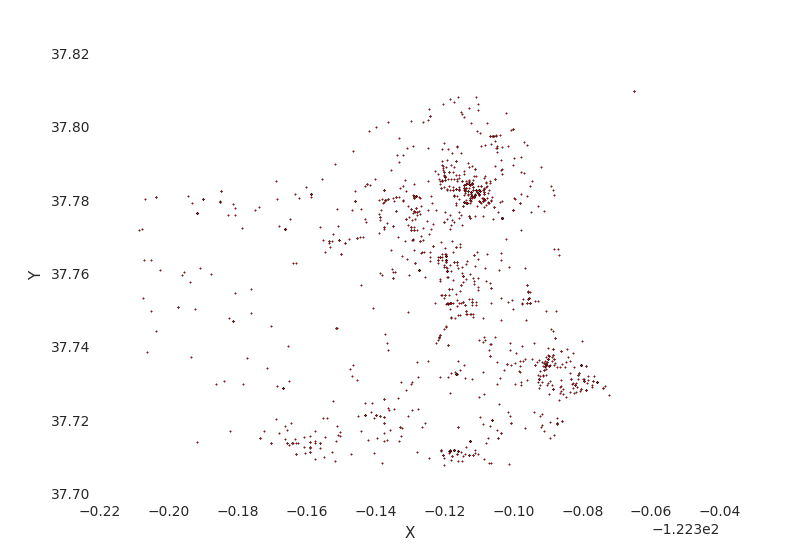

In [37]:
q8_year = spark.sql("SELECT CAST(X as float),CAST(Y as float), Year FROM sf_crime_date  WHERE X < -121 and Year == 2004 and Category = 'WEAPON LAWS' ")

year = 2004
display(q8_year.toPandas().plot.scatter(x = 'X', y = 'Y', s = 1, c = 'r').figure)

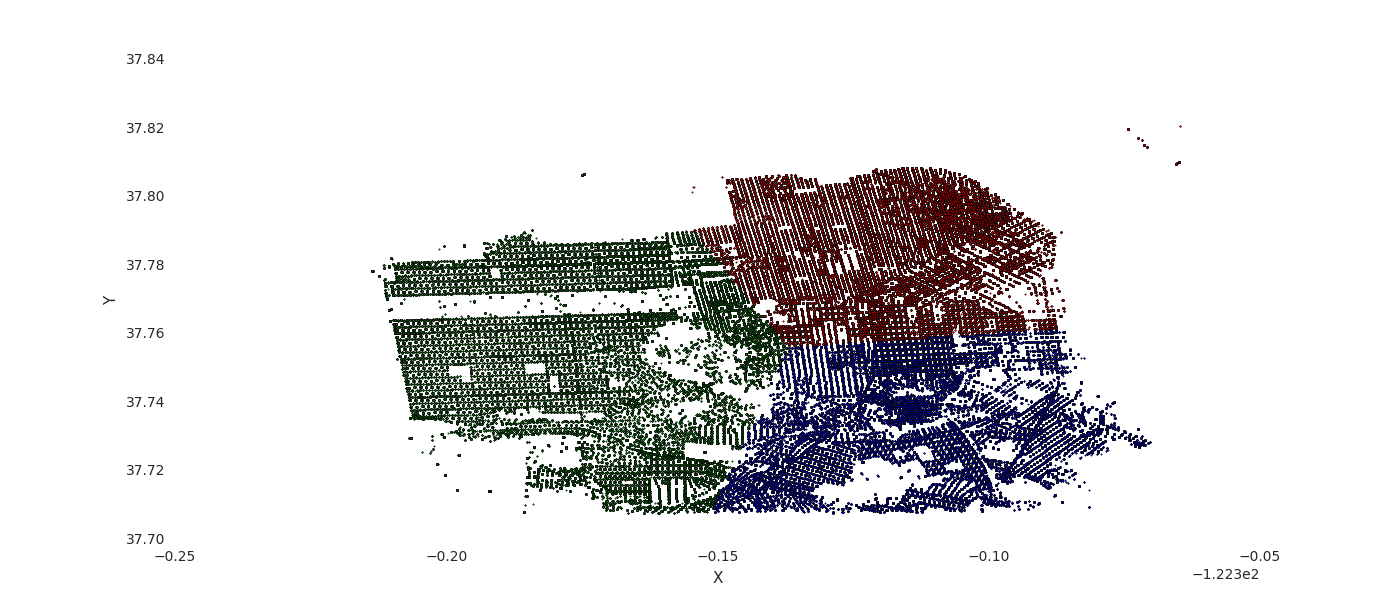

In [38]:
fig, ax = plt.subplots(figsize=(14,6))

# res = transformed.toPandas()
res.where(res.prediction == 0).plot.scatter(x = 'X', y = 'Y', ax=ax, s = 1, c = 'r')
res.where(res.prediction == 1).plot.scatter(x = 'X', y = 'Y', ax=ax, s = 1, c = 'g')
res.where(res.prediction == 2).plot.scatter(x = 'X', y = 'Y', ax=ax, s = 1, c = 'b')
# plt.scatter(grades_range, girls_grades, color='r')
# plt.scatter(grades_range, boys_grades, color='g')

display(fig)

### Conclusion. 
Use four sentences to summary your work. Like what you have done, how to do it, what the techinical steps, what is your business impact. 
More details are appreciated. You can think about this a report for your manager. Then, you need to use this experience to prove that you have strong background on big  data analysis.  
Point 1:  what is your story ? and why you do this work ?   
Point 2:  how can you do it ?  keywords: Spark, Spark SQL, Dataframe, Data clean, Data visulization, Data size, clustering, OLAP,   
Point 3:  what do you learn from the data ?  keywords: crime, trend, advising, conclusion, runtime

Analyzed the distribution of SF crime over category, district, hour, day, month and location seperately.  
Processed SF crime data from 2003 to 2018 for data cleaning, data visulization by Spark Dataframe, Spark SQL, kmeans.  
Give proper advice for police to reduce the crime and for visitor to have a better experience according to the analysis.

### Optional part: Time series analysis
This part is not based on Spark, and only based on Pandas Time Series package.   
Note: I am not familiar with time series model, please refer the ARIMA model introduced by other teacher.   
process:  
1.visualize time series  
2.plot ACF and find optimal parameter  
3.Train ARIMA  
4.Prediction 

Refer:   
https://zhuanlan.zhihu.com/p/35282988  
https://zhuanlan.zhihu.com/p/35128342  
https://www.statsmodels.org/dev/examples/notebooks/generated/tsa_arma_0.html  
https://www.howtoing.com/a-guide-to-time-series-forecasting-with-arima-in-python-3  
https://www.joinquant.com/post/9576?tag=algorithm  
https://blog.csdn.net/u012052268/article/details/79452244